# Lead Scoring Case Study

## Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected

1. A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation
    i. Mention the problem statement and the analysis approach briefly 
    ii. Explain the results in business terms
    iii. Include visualisations and summarise the most important results in the presentation
4. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

## Step 1: Importing the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Data Frame

In [3]:
# Dimensions of dataset
leads.shape

(9240, 37)

In [4]:
# Statistic of dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Cleaning

In [6]:
# We observe that certain columns have a value "select". 
# This seems to be the default value in case the visitor doesn't select anything.
# Hence we replace it with NaN

leads = leads.replace("Select",np.NaN)

In [7]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking null values in all the columns
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the percentage of null values in all columns
round(100 * (leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Drop the columns with more that 70% Null values
leads = leads.drop(leads.loc[:,list(round(100 * (leads.isnull().sum()/len(leads.index)), 2) > 70)].columns, 1)

In [11]:
# Checking the percentage of null values in all columns again
round(100 * (leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

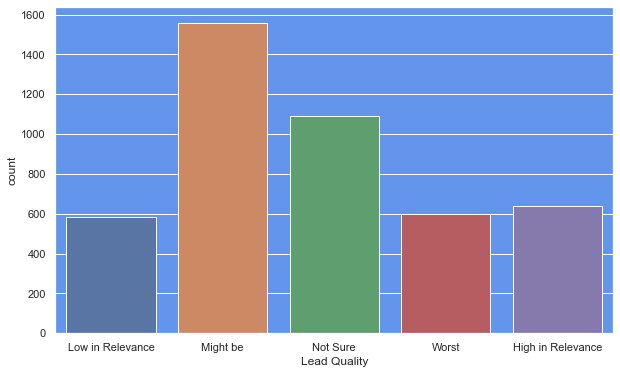

In [13]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(leads['Lead Quality'])

In [14]:
# We have 51% NULL values here so we need to replace the NULL values. 
# "Not Sure" seems to be the most neutral value
leads['Lead Quality'] = leads['Lead Quality'].replace(np.NaN,"Not Sure")

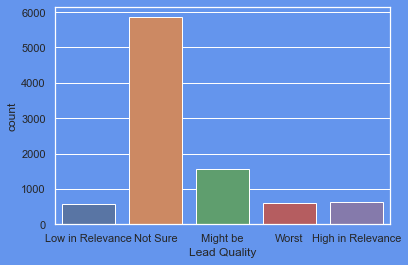

In [15]:
sns.countplot(leads['Lead Quality'])

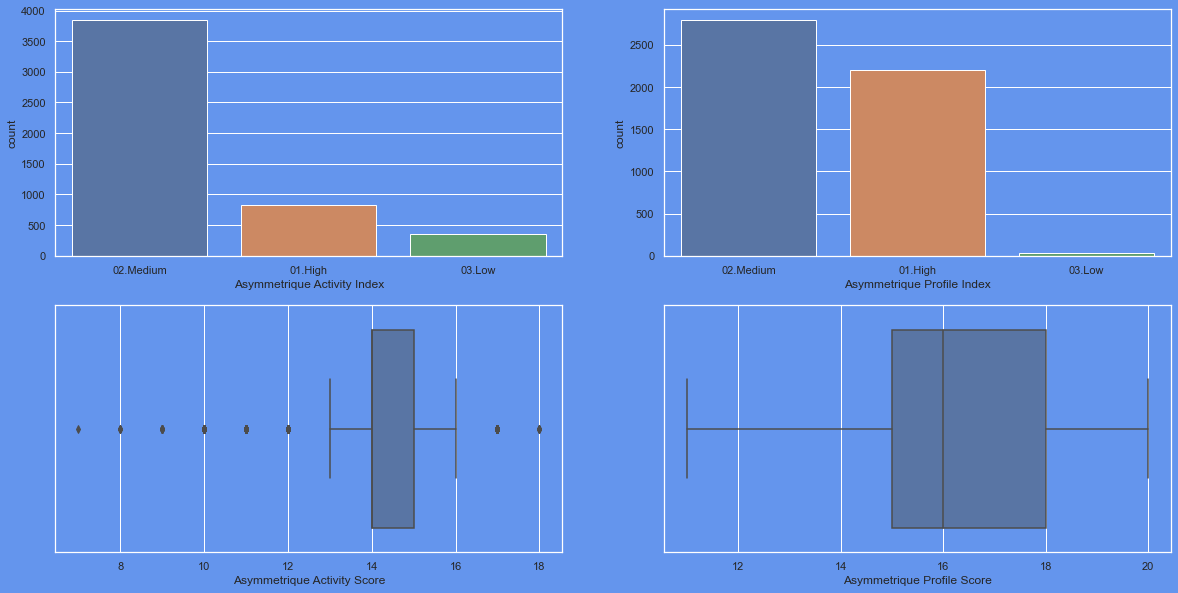

In [16]:
# Plotting Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score
 
plt.figure (figsize=(20,10))

sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

plt.subplot(2,2,1)
sns.countplot(leads['Asymmetrique Activity Index'])

plt.subplot(2,2,2)
sns.countplot(leads['Asymmetrique Profile Index'])

plt.subplot(2,2,3)
sns.boxplot(leads['Asymmetrique Activity Score'])

plt.subplot(2,2,4)
sns.boxplot(leads['Asymmetrique Profile Score'])

plt.show()

In [17]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [18]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [19]:
leads['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [20]:
leads['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [21]:
# There is variation in data in these four columns 
# and we were looking at the data in order to impute the NULL values (which are 45%)
# So we cant make a conclusive decision on this so we drop these columns

leads = leads.drop (['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [22]:
# City has now the highest NULL values

leads["City"].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

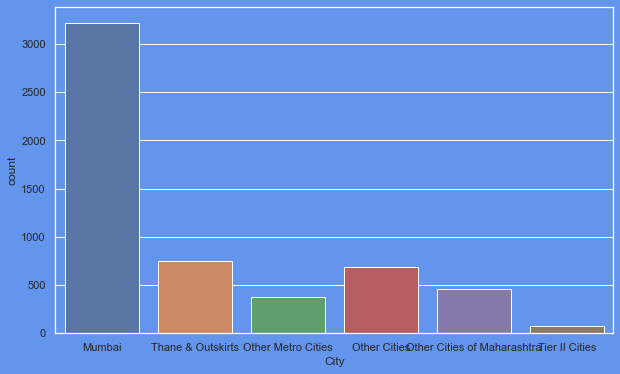

In [23]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(leads["City"])


In [24]:
# Since Mumbai is the highest occurrence in the data set, we replace NULL values with Mumbai
leads["City"] = leads["City"].replace(np.NaN,"Mumbai")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

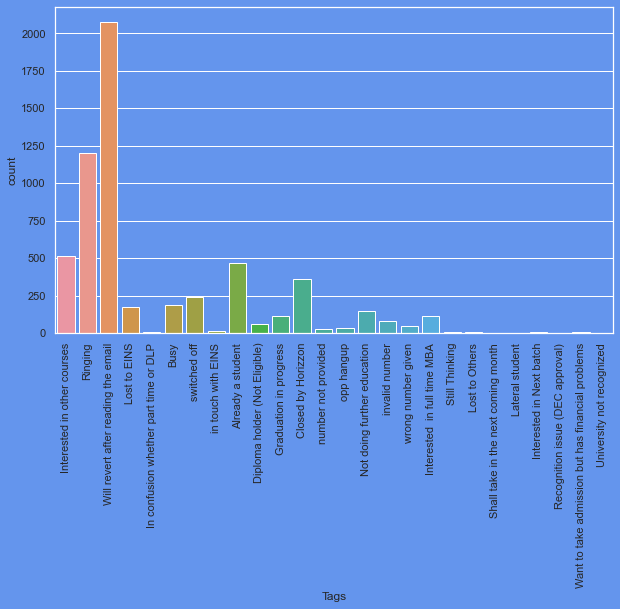

In [25]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(leads["Tags"])
plt.xticks(rotation = 90)

In [26]:
# "Will revert after reading the email" has the highest count in all the tags so we replace NULL values with that

leads["Tags"] = leads["Tags"].replace(np.NaN,"Will revert after reading the email")

In [27]:
leads["Tags"].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

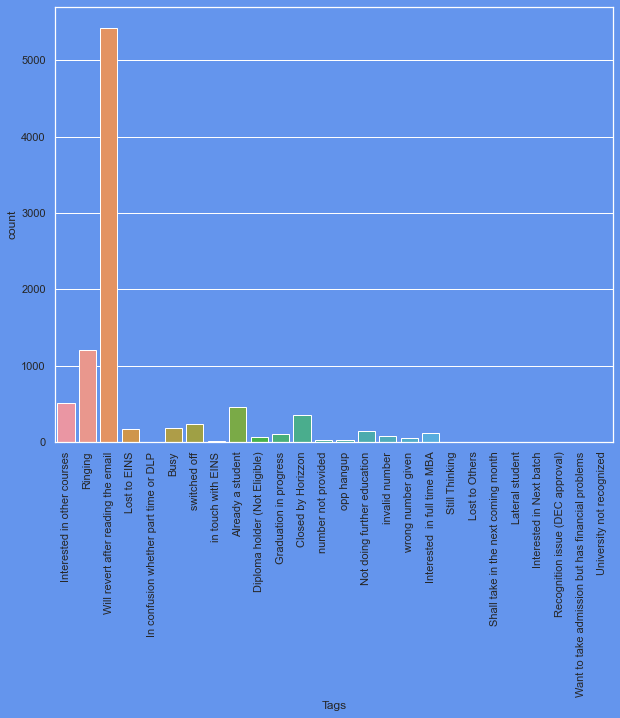

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(leads["Tags"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

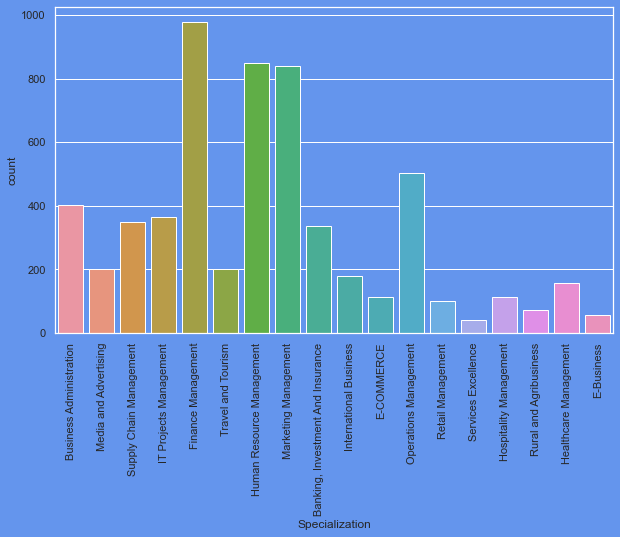

In [29]:
plt.figure (figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(leads["Specialization"])
plt.xticks(rotation = 90)

In [30]:
leads["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [31]:
leads["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [32]:
# "Finance Management" has the highest count but overall not very high proportion so we replace NULL with "Others"
leads["Specialization"] = leads["Specialization"].replace(np.NaN,"Others")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

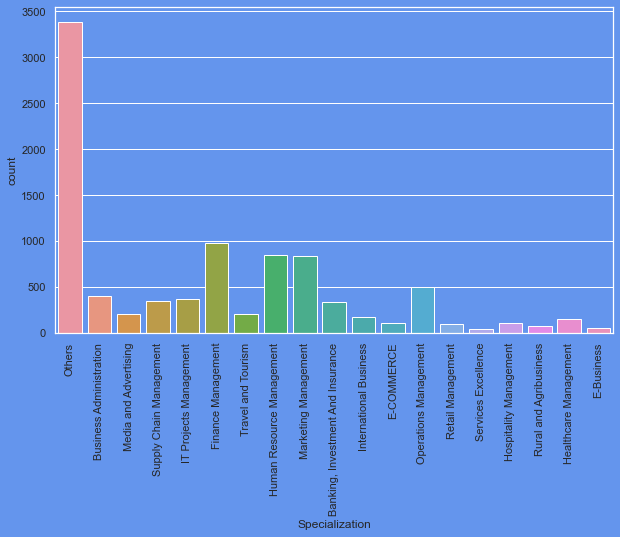

In [33]:
plt.figure (figsize=(10,6))
sns.countplot(leads["Specialization"])
plt.xticks(rotation = 90)

In [34]:
leads["What matters most to you in choosing a course"].describe()


count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [35]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
# "Better Career Prospects" has the highest count and also, realistically speaking, that is why
# most people will join any course

leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")

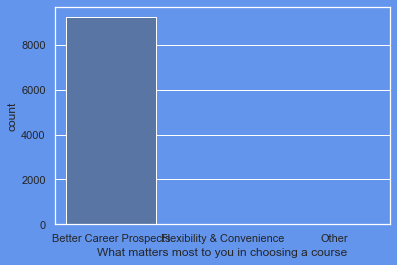

In [37]:
sns.countplot(leads["What matters most to you in choosing a course"])

In [38]:
leads["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [39]:
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [40]:
# "Unemployed" has a very high count so we can safely replace NULL with "Unemployed"

leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.NaN,"Unemployed")

In [41]:
leads["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [42]:
leads["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Ghana                      2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Italy                      2
Belgium                    2
Kenya                      1
Sri Lanka                  1
Switzerland                1
Indonesia                  1
Vietnam                    1
Russia                     1
Tanzania      

In [43]:
# "India" has very high count so we can safely replace NULL with "India"

leads["Country"] = leads["Country"].replace(np.NaN,"India")

In [44]:
leads["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
leads["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [46]:
# here 0 has the highest count but not by a large proportion so we replace NULL with mean
leads["TotalVisits"] = leads["TotalVisits"].replace(np.NaN,leads["TotalVisits"].mean())

In [47]:
leads["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [48]:
leads["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [49]:
# here 0 has the highest count but not by a large proportion so we replace NULL with mean

leads["Page Views Per Visit"] = leads["Page Views Per Visit"].replace(np.NaN,leads["Page Views Per Visit"].mean())

In [50]:
leads["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [51]:
leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [52]:
# "Email Opened" has the highest count and since NULL values are only 1% we can replace them with "Email Opened"

leads["Last Activity"] = leads["Last Activity"].replace(np.NaN,"Email Opened")

In [53]:
leads["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [54]:
leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
blog                    1
NC_EDM                  1
youtubechannel          1
testone                 1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [55]:
# "Google" is the highest count and NULL values are only 0.39 % so we can safely replace them with "Google"
leads["Lead Source"] = leads["Lead Source"].replace(np.NaN,"Google")

In [56]:
# Checking the percentage of null values in all columns again
round(100 * (leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Step 4: EDA

### Univariate analysis

In [57]:
# Calculating conversion percentage
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

#### Lead Origin

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

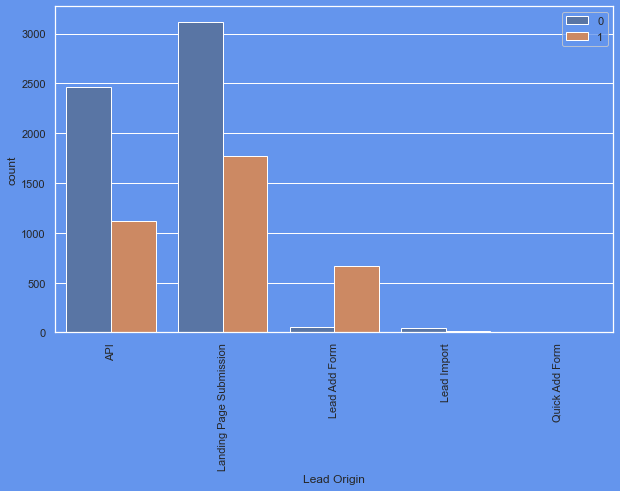

In [58]:
plt.figure (figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(x = "Lead Origin", hue="Converted", data=leads).legend(loc="upper right")
plt.xticks(rotation=90)

#### Observation

- API and Landing Page submission have approximately 40% and 56% conversion rate and overall count from these two sources are high
- Lead Add Form has very high conversion rate but overall conversion count is very low

**Since we have high conversion counts from API and Landing Page Submissions, we can focus on increasing the conversion rate from these two sources**

#### Lead Source


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

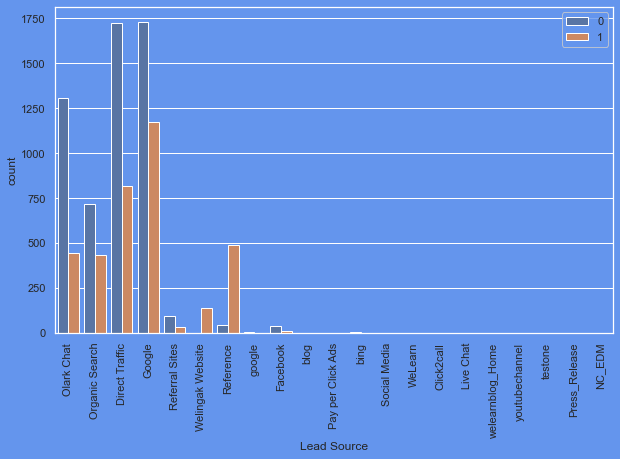

In [59]:
plt.figure (figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(x = "Lead Source", hue="Converted", data=leads).legend(loc="upper right")
plt.xticks(rotation=90)

In [60]:
# Apparently Google and google are two different categorical values which are actually same so we combine them.
leads["Lead Source"] = leads["Lead Source"].replace(['google'],'Google')

# Also, since other categorical values have negligible counts as compared to the more prominent ones, 
# we can combine all such categories into others
leads["Lead Source"] = leads["Lead Source"].replace(['blog','Pay per Click Ads','bing','Social Media',
                                                     'WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel',
                                                    'testone','Press_Release','NC_EDM'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

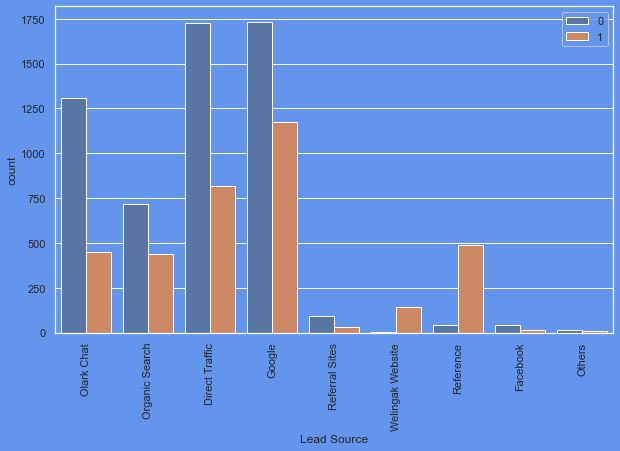

In [61]:
plt.figure (figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.countplot(x = "Lead Source", hue="Converted", data=leads).legend(loc="upper right")
plt.xticks(rotation=90)

#### Observations

- Direct Traffic and Google have similar counts with Google having highest conversion rates
- Organic Search also has a relatively high conversion rate.
- Same goes for Reference but overall count is very less

**To increase the overall conversion rate, we can focus on increasing the conversion rates from Google, Direct Traffic, Organic Search and Olark chat**

#### Do Not Email and Do Not Call

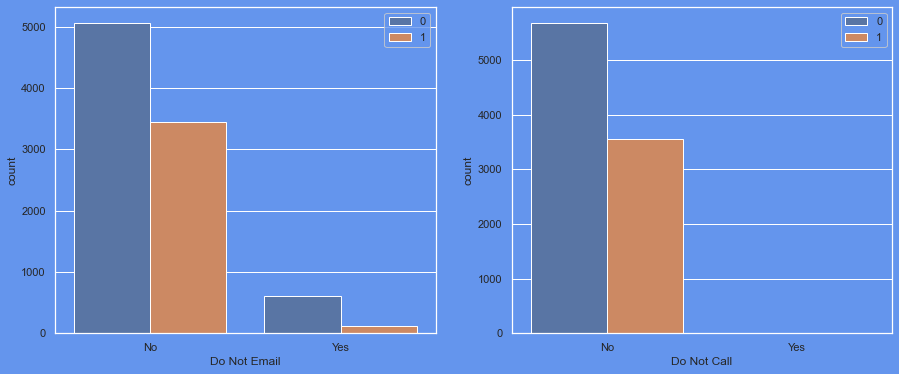

In [62]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email",hue="Converted", data=leads).legend(loc="upper right")

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call",hue="Converted", data=leads).legend(loc="upper right")

#### Observation

- People who said that they don't want to be Emailed have higher conversion rate than people who said that they wanted to be Emailed
- Same goes for the Do Not Call column as well

#### Total Visits

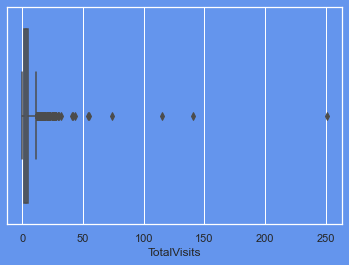

In [63]:
sns.boxplot(leads["TotalVisits"])

**We need to remove outliers**

In [64]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [65]:
# We will cap the values to 95% percentile
percentile_95 = leads["TotalVisits"].quantile([0.05,0.95]).values

In [66]:
percentile_95


array([ 0., 10.])

In [67]:
leads['TotalVisits'][leads['TotalVisits'] <= percentile_95[0]] = percentile_95[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentile_95[1]] = percentile_95[1]

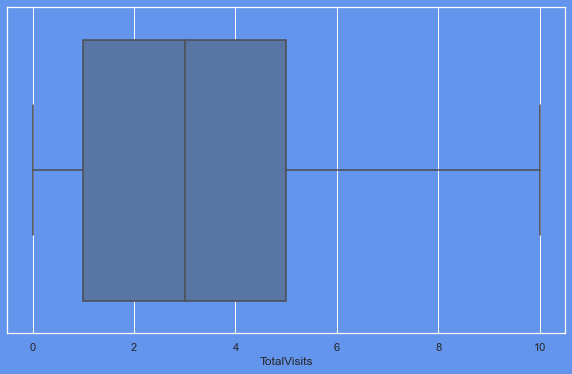

In [68]:
plt.figure (figsize=(10,6))
sns.boxplot(leads["TotalVisits"])

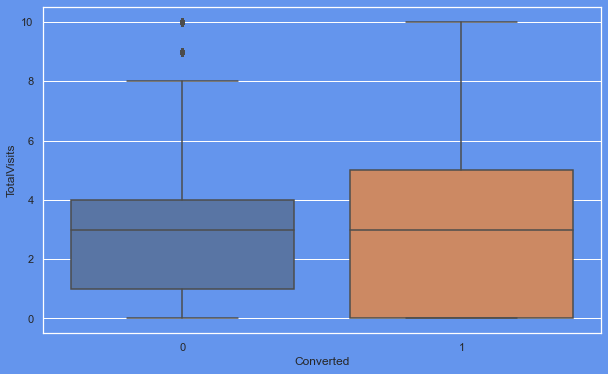

In [69]:
plt.figure (figsize=(10,6))
sns.boxplot(y="TotalVisits",x="Converted",data=leads)

#### Observations

- Medians for not converted and converted are almost same
- people with 0 - 6 visits are seen to be converted but then again people with 1 - 4 visits are also seen to not be converted 

**so nothing conclusive is observed from this column**

#### Total time spent on website

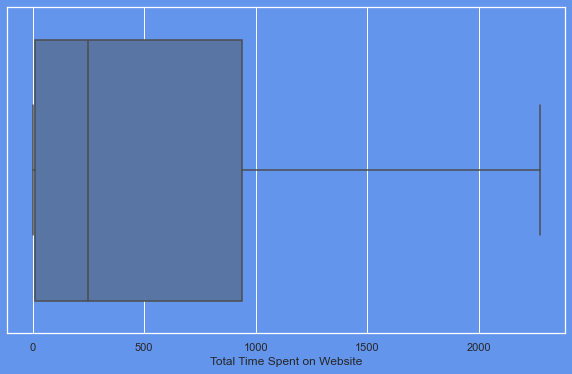

In [70]:
plt.figure (figsize=(10,6))
sns.boxplot(leads["Total Time Spent on Website"])

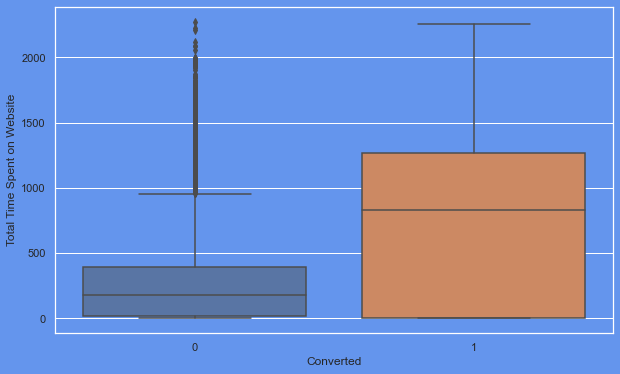

In [71]:
plt.figure (figsize=(10,6))
sns.boxplot(y="Total Time Spent on Website",x="Converted",data=leads)

#### Observations

- people spending more time on the website are more likely to be converted

**Keeping the website updated regularly is recommended**

#### Page views per visit

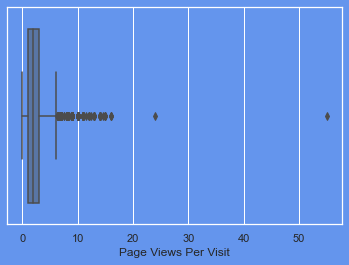

In [72]:
sns.boxplot(leads["Page Views Per Visit"])

In [73]:
# Again we have outliers so we will attempt to cap the data at 95% percentile
percentile_95 = leads["Page Views Per Visit"].quantile([0.05,0.95]).values

leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentile_95[0]] = percentile_95[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentile_95[1]] = percentile_95[1]

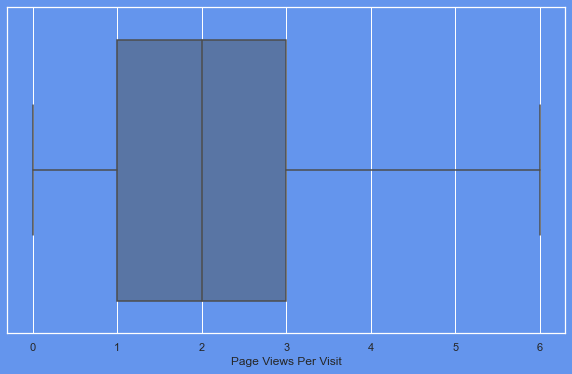

In [74]:
plt.figure (figsize=(10,6))
sns.boxplot(leads["Page Views Per Visit"])

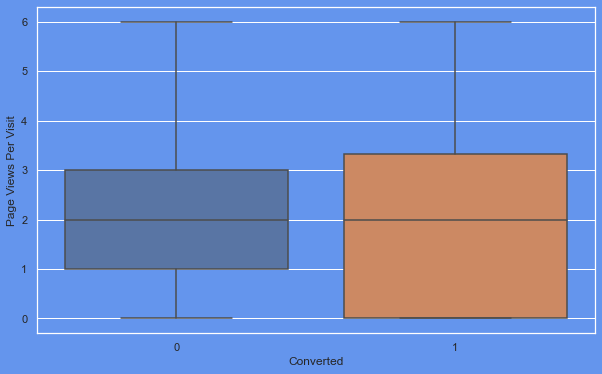

In [75]:
plt.figure (figsize=(10,6))
sns.boxplot(y="Page Views Per Visit",x="Converted",data=leads)

#### Observations

- Medians for both conversions and non conversions is same

**So nothing conclusive can be said here**

#### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

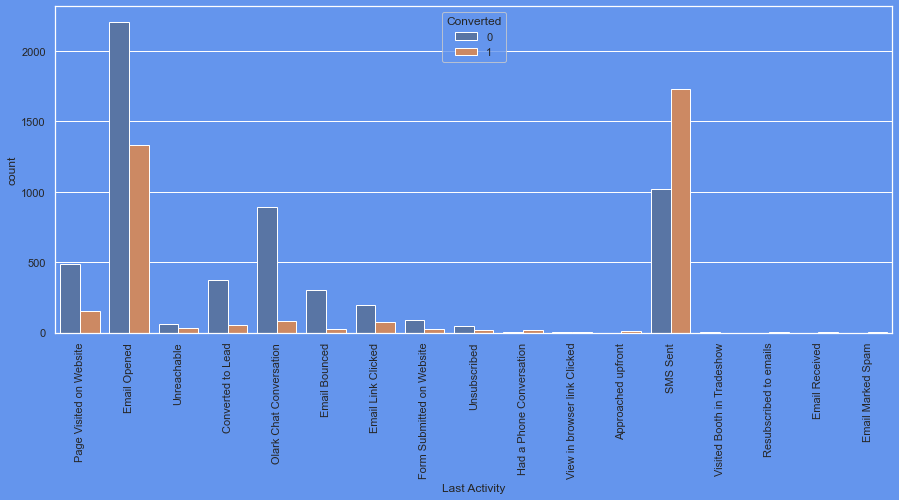

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.xticks(rotation=90)

In [77]:
#Since certain categorical values have negligible count as compared to the more prominent ones,
# we can combine them into Others category
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                         'Approached upfront','Visited Booth in Tradeshow','Resubscribed to emails'
                                                        ,'Email Received','Email Marked Spam'],"Other_Activity")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

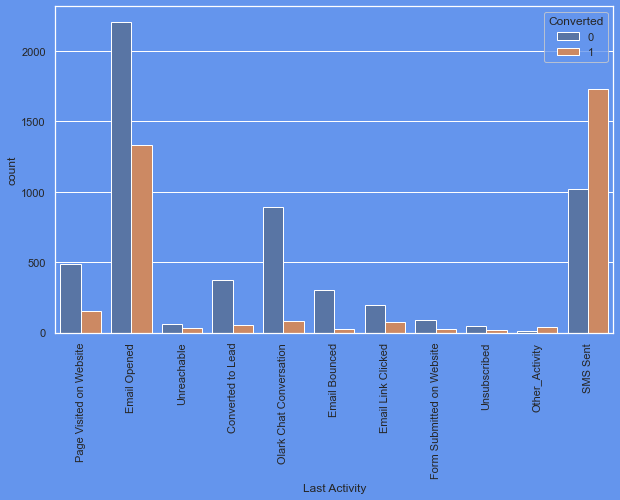

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.xticks(rotation=90)

#### Observations

- People getting SMS have the highest conversion rate although their count is second highest, with people who are opening the emails having the highest count

- People having Olark char conversations are significant in number although their conversion rate is very low

**Focus can be on increasing conversion rates for Email Opened, SMS sent, Olark chat conversations**

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

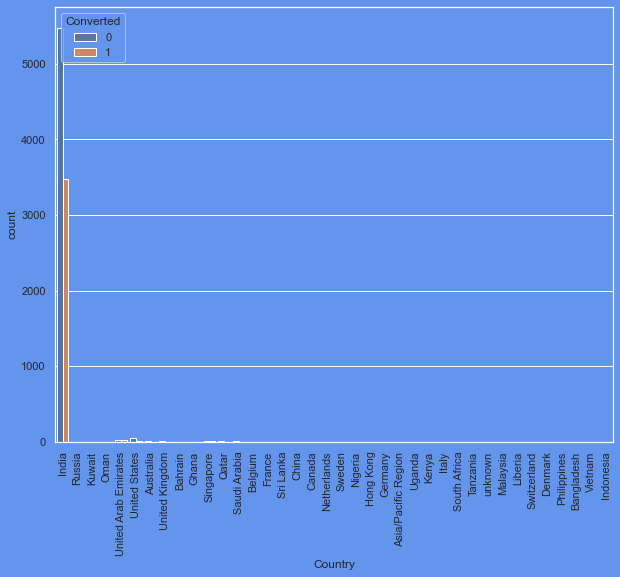

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x="Country",hue="Converted",data=leads)
plt.xticks(rotation=90)

In [80]:
# Here as well, there are a lot of countries where the count is negligible so we combine them to other countries
leads["Country"] = leads["Country"].replace(['Russia','Kuwait','Oman','Bahrain','Ghana','Qatar','Saudi Arabia','Belgium',
                                             'France','Sri Lanka','China','Canada','Netherlands','Sweden','Nigeria','Hong Kong',
                                             'Germany','Asia/Pacific Region','Uganda','Kenya','Italy','South Africa','Tanzania'
                                            ,'unknown','Malaysia','Liberia','Switzerland','Denmark','Philipines','Bangladesh',
                                            'Vietnam','Indonesia'],'Other_Country')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

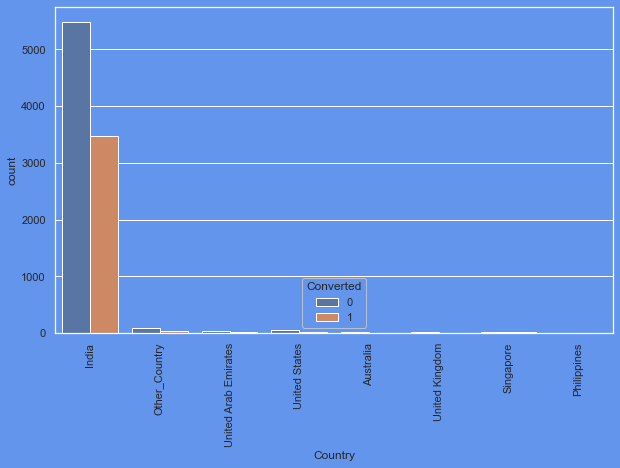

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x="Country",hue="Converted",data=leads)
plt.xticks(rotation=90)

#### Specialization

#### Observations

**Not much to conclude as India still has the highest count**

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

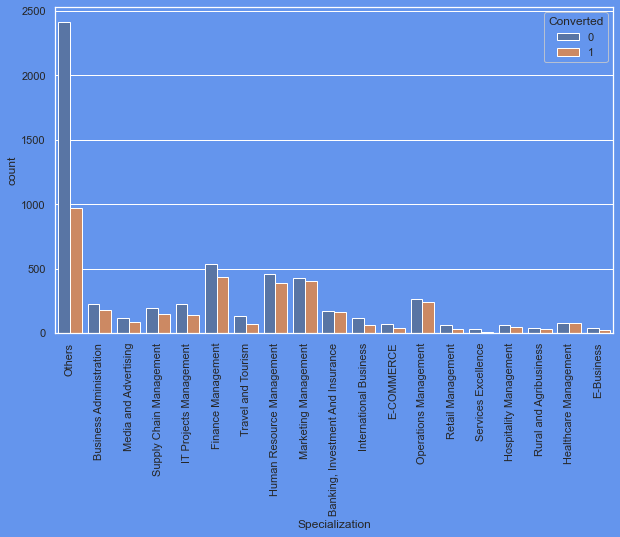

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x="Specialization",hue="Converted",data=leads)
plt.xticks(rotation=90)

#### Observation

**We need to focus on specializations having high conversion rates and try to increase them even further i.e. Finance Management, HR Management, Marketing Management, Operations Management etc**

#### Occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

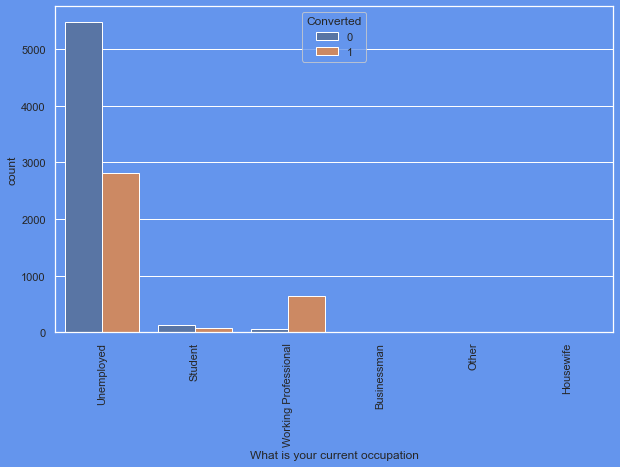

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x="What is your current occupation",hue="Converted",data=leads)
plt.xticks(rotation=90)

#### Observations

- Working professionals have high conversion rates although very less count
- Unemployed people, although high in number, have low conversion rate

**Increasing the number of working professionals signing up and increasing the conversion rates of unemployed people will help**

#### What matters most to you in choosing this course


In [84]:
leads['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

**Since most entries are Better Career prospects, we can't conclude much here**

#### Search

In [85]:
leads['Search'].describe()

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

**Most entries are No. Nothing to conclude here**

#### Magazine

In [86]:
leads['Magazine'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

**Most entries are No. Nothing to conclude here**

#### Newspaper Article

In [87]:
leads['Newspaper Article'].describe()

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

**Most entries are No. Nothing to conclude here**

#### X Education Forums

In [88]:
leads['X Education Forums'].describe()

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

**Most entries are No. Nothing to conclude here**

#### Newspaper

In [89]:
leads['Newspaper'].describe()

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

**Most entries are No. Nothing to conclude here**

#### Digital Advertisement

In [90]:
leads['Digital Advertisement'].describe()

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

**Most entries are No. Nothing to conclude here**

#### Through Recommendations

In [91]:
leads['Through Recommendations'].describe()

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

**Most entries are No. Nothing to conclude here**

#### Receive More Updates About Our Courses

In [92]:
leads['Receive More Updates About Our Courses'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

**Most entries are No. Nothing to conclude here**

#### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

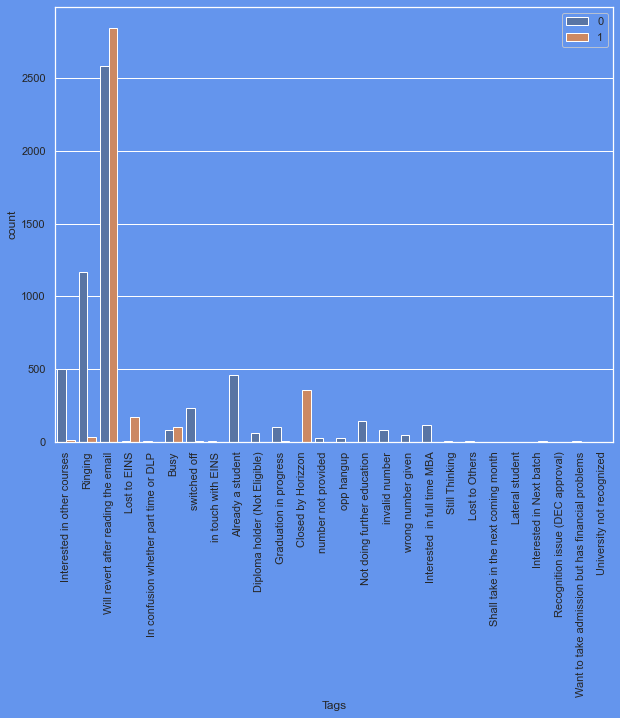

In [93]:
plt.figure(figsize=(10,8))
sns.countplot(x="Tags",hue="Converted",data=leads).legend(loc='upper right')
plt.xticks(rotation=90)

In [94]:
# Categorical values with negligible count as compared to the prominent ones can be grouped under others

leads["Tags"] = leads["Tags"].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)',
                                      'number not provided','opp hangup','Not doing further education','invalid number',
                                       'wrong number given','Still Thinking','Lost to Others','Shall take in the next coming month',
                                       'Lateral student','Interested in Next batch','Recognition issue (DEC approval)',
                                       'Want to take admission but has financial problems','University not recognized'],'Other_tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

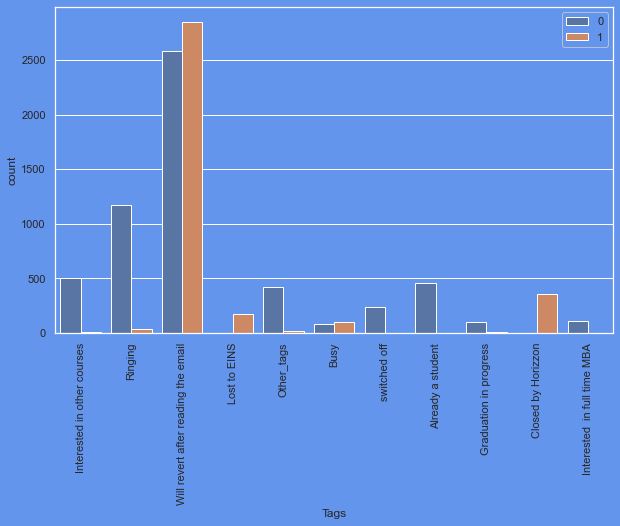

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x="Tags",hue="Converted",data=leads).legend(loc='upper right')
plt.xticks(rotation=90)

#### Observations

- People who say they will revert after reading the email have the highest conversion rates
- People who have been called and are not picking up are high in count but very low in terms of conversion rates. Same goes for people interested in other courses

#### Lead Quality

In [96]:
leads['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

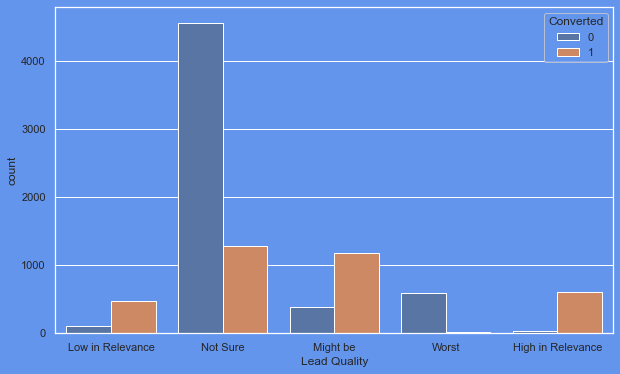

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x='Lead Quality',hue='Converted',data=leads)

#### Observations

- Max count is where the lead qualIty cant be determined thus the low conversion rate there.
- Proportionally speaking, the highest conversion rate is for the lead quality "High in Relevance" but its count is very less
- "Might be" Lead Quality also has a high conversion rate

**Getting high quality leads would be important**

#### Update me on Supply Chain Content

In [98]:
leads["Update me on Supply Chain Content"].describe()

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object

**Most entries are No. Nothing to conclude here**

#### Get updates on DM Content

In [99]:
leads['Get updates on DM Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object

**Most entries are No. Nothing to conclude here**

#### City

In [100]:
leads["City"].describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

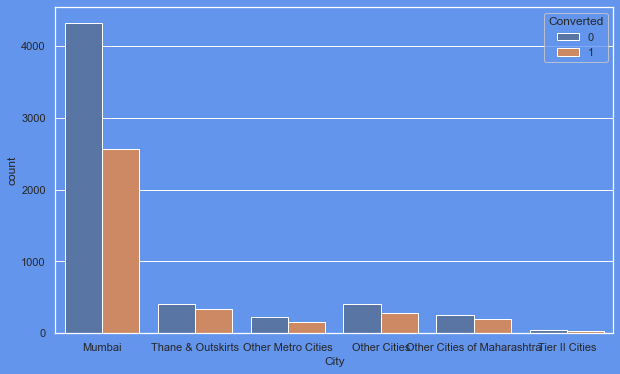

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(x='City',hue='Converted',data=leads)

#### Observations

- Mumbai has the max count of people registering for courses and a decent conversion rate of around 50%
- Thane and outskirts actually has a higher conversion rate but very less count
- Same goes for other cities

**Focus can be more people registering from Mumbai to increase their conversion rate**

#### I agree to pay the amount through cheque

In [102]:
leads["I agree to pay the amount through cheque"].describe()

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

**Most entries are No. Nothing to conclude here**

#### a free copy of Mastering The Interview

In [103]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

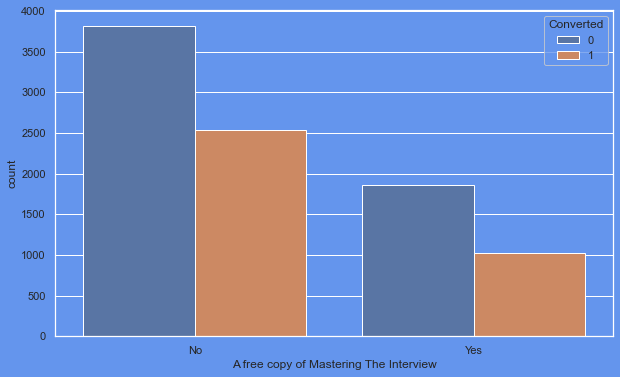

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(x="A free copy of Mastering The Interview",hue='Converted',data=leads)

#### Observations

- People who were not interested in getting a free copy of "Mastering the interview" have a higher conversion rate (and count) as compared to people who did opt for a free copy of "Mastering the interview"

#### Last Notable Activity


In [105]:
leads["Last Notable Activity"].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

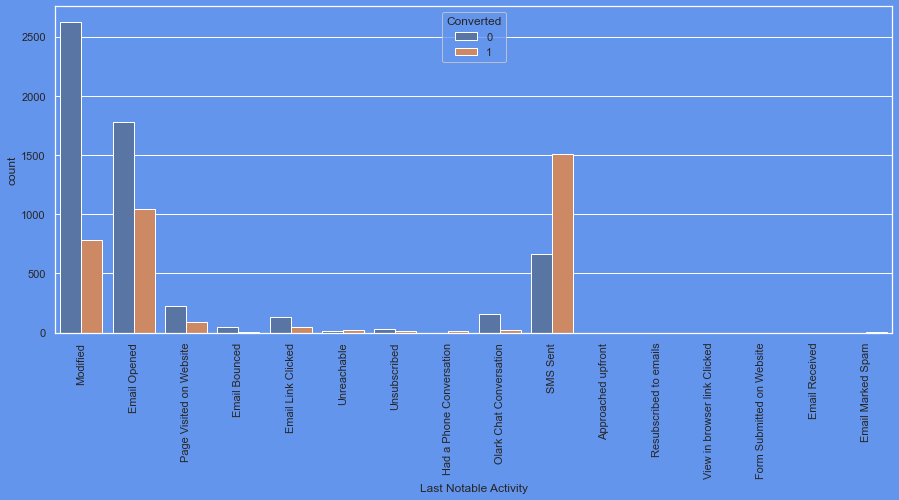

In [106]:
plt.figure(figsize=(15,6))
sns.countplot(x="Last Notable Activity",hue='Converted',data=leads)
plt.xticks(rotation=90)

In [107]:
# We have certain categorical values which have negligible count as compared to the more prominent ones so we combine them into others

leads["Last Notable Activity"] = leads["Last Notable Activity"].replace(['Approached upfront','Resubscribed to emails',
                                                                         'View in browser link Clicked','Form Submitted on Website',
                                                                         'Email Received','Email Marked Spam','Had a Phone Conversation']
                                                                        ,'Other_Activity')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

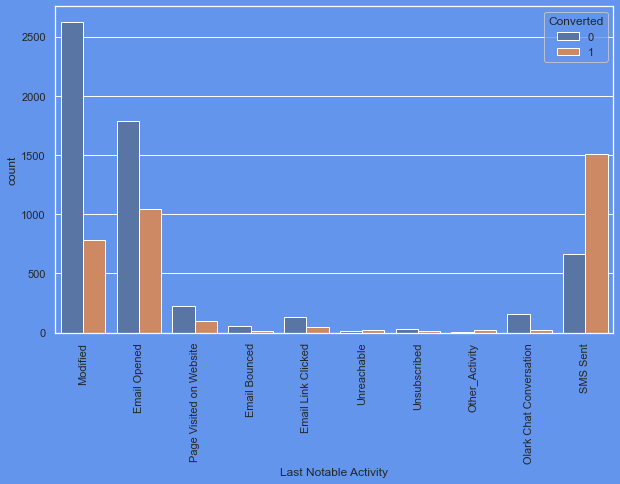

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(x="Last Notable Activity",hue='Converted',data=leads)
plt.xticks(rotation=90)

#### Observations

- "Modified" column might refer to people who might have modified their profile on website (just an assumption) and it has the highest count but very low conversion rate
- "SMS sent" has a high conversion rate but low count

**Overall, this column will not really help us make a business decision**

**After univariate analysis, we saw that there are certain columns which will not help us with our analysis, so we drop them**

In [109]:
# List of variables to drop. 
#Dropping these variables as they have most of the values towards one attribute 
#and using them might introduce bias in the model

columns_to_drop = ['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                   'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','What matters most to you in choosing a course']

In [110]:
leads = leads.drop(columns_to_drop,1)

In [111]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [112]:
leads.shape

(9240, 16)

### Data preparation

#### Converting Binary (Yes/No) variables to 1/0

In [113]:
# List of variables to map
binary_var_list = ['Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[binary_var_list] = leads[binary_var_list].apply(binary_map)

In [114]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#### Creating dummies for categorical variables with multiple levels

In [115]:
vars_for_dummies = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags',
                    'Lead Quality','City','Last Notable Activity']

dummies_1 = pd.get_dummies(leads[vars_for_dummies],drop_first=True)

dummies_1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [116]:
leads = pd.concat([leads,dummies_1],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


**Now we drop the original categorical columns**

In [117]:
leads = leads.drop(vars_for_dummies,axis=1)

In [118]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Train test split

In [119]:
# Defining X and y

X = leads.drop(['Prospect ID','Converted'],axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [120]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [121]:
# Splitting into train and test data set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [122]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,0,0,4.0,487,1.33,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,0,0,5.0,106,2.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8105,0,0,5.0,1230,5.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
X_train.shape

(6468, 78)

### Step 5 : Feature scaling

In [124]:
scaler = StandardScaler()

vars_to_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,0,-1.152121,-0.885371,-1.269958,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,0,0,0.297240,0.005716,-0.519633,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,0,0,0.659580,-0.691418,0.140427,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8105,0,0,0.659580,1.365219,1.550812,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,-1.152121,-0.885371,-1.269958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
# Checking the conversion rate

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100

Converted

38.53896103896104

**Current conversion rate is 38.5%**

### Step 6: Model Building

In [126]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)

logis_model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()) 

logis_model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.1
Date:                Fri, 09 Apr 2021   Deviance:                       2662.3
Time:                        21:55:08   Pearson chi2:                 4.43e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7792      1.905     -0.934      0.350      -5.512       1.954
Do Not Email                                            -0.8951      0.303     -2.959      0.003      -1.488      -0.302
Do Not Call                                             21.2016   3.03e+04      0.001      0.999   -5.94e+04    5.95e+04
TotalVisits                                              0.2734      0.083      3.301      0.001       0.111       0.436
Total Time Spent on Website                              1.0392      0.060     17.253      0.000       0.921       1.157
Page Views Per Visit                                    -0.2787      0.093     -2.991      0.003      -0.461      -0.096
Lead Origin_Landing Page Submission                     -0.6805      0.215     -3.170      0.002      -1.101      -0.260
Lead Origin_Lead Add Form                                1.8737      0.675      2.774      0.006       0.550       3.198
Lead Origin_Lead Import                                  4.1619      1.824      2.282      0.022       0.587       7.737
Lead Origin_Quick Add Form                              22.2532   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                    -4.3927      1.830     -2.400      0.016      -7.980      -0.806
Lead Source_Google                                       0.1624      0.151      1.075      0.282      -0.134       0.458
Lead Source_Olark Chat                                   0.7660      0.225      3.400      0.001       0.324       1.207
Lead Source_Organic Search                               0.1811      0.202      0.896      0.370      -0.215       0.577
Lead Source_Others                                       0.2966      0.794      0.373      0.709      -1.260       1.854
Lead Source_Reference                                   -0.6015      0.755     -0.797      0.425      -2.081       0.878
Lead Source_Referral Sites                              -0.0165      0.423     -0.039      0.969      -0.845       0.812
Lead Source_Welingak Website                             3.0327      0.998      3.039      0.002       1.077       4.989
Last Activity_Email Bounced                             -0.8677      0.712     -1.219      0.223      -2.263       0.528
Last Activity_Email Link Clicked                         0.6781      0.602      1.126      0.260      -0.502       1.859
Last Activity_Email Opened                               0.1449      0.389      0.372      0.710      -0.618       0.908
Last Activity_Form Submitted on Website                  0.1434      0.603      0.238      0.812      -1.038       1.324
Last Activity_Olark Chat Conversation                   -0

#### Feature selection using RFE

In [127]:
logis_reg = LogisticRegression()

# 15 variables to choose
rfe = RFE(logis_reg, 15)

rfe = rfe.fit(X_train, y_train)

In [128]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False])

In [129]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Others', False, 45),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 61),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 42),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Other_Activity', False, 18),
 ('Last Activity_Page Visited on We

In [130]:
# Checking the top 15 columns
col_top_15 = X_train.columns[rfe.support_]
col_top_15

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [131]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospit

In [132]:
# Logistic regression model with top 15 columns chosen
X_train_sm = sm.add_constant(X_train[col_top_15])

logis_model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()) 

res = logis_model_2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.9
Date:                Fri, 09 Apr 2021   Deviance:                       3173.8
Time:                        21:55:17   Pearson chi2:                 3.39e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4965      0.214     -7.007      0.000      -1.915      -1.078
Lead Origin_Lead Add Form                                0.8900      0.298      2.986      0.003       0.306       1.474
Lead Source_Welingak Website                             3.3981      0.795      4.272      0.000       1.839       4.957
Last Activity_SMS Sent                                   1.2192      0.183      6.678      0.000       0.861       1.577
What is your current occupation_Working Professional     1.3295      0.281      4.731      0.000       0.779       1.880
Tags_Busy                                                3.5753      0.315     11.337      0.000       2.957       4.193
Tags_Closed by Horizzon                                  9.1344      1.045      8.739      0.000       7.086      11.183
Tags_Lost to EINS                                        9.3595      0.754     12.421      0.000       7.883      10.836
Tags_Ringing                                            -1.7636      0.313     -5.635      0.000      -2.377      -1.150
Tags_Will revert after reading the email                 3.7308      0.222     16.769      0.000       3.295       4.167
Tags_switched off                                       -2.5007      0.578     -4.327      0.000      -3.633      -1.368
Lead Quality_Not Sure                                   -3.3366      0.131    -25.433      0.000      -3.594      -3.079
Lead Quality_Worst                                      -3.4673      0.684     -5.070      0.000      -4.808      -2.127
Last Notable Activity_Modified                          -1.3000      0.124    -10.499      0.000      -1.543      -1.057
Last Notable Activity_Olark Chat Conversation           -1.2259      0.362     -3.384      0.001      -1.936      -0.516
Last Notable Activity_SMS Sent                           1.0226      0.219      4.675      0.000       0.594       1.451
========================================================================================================================
"""

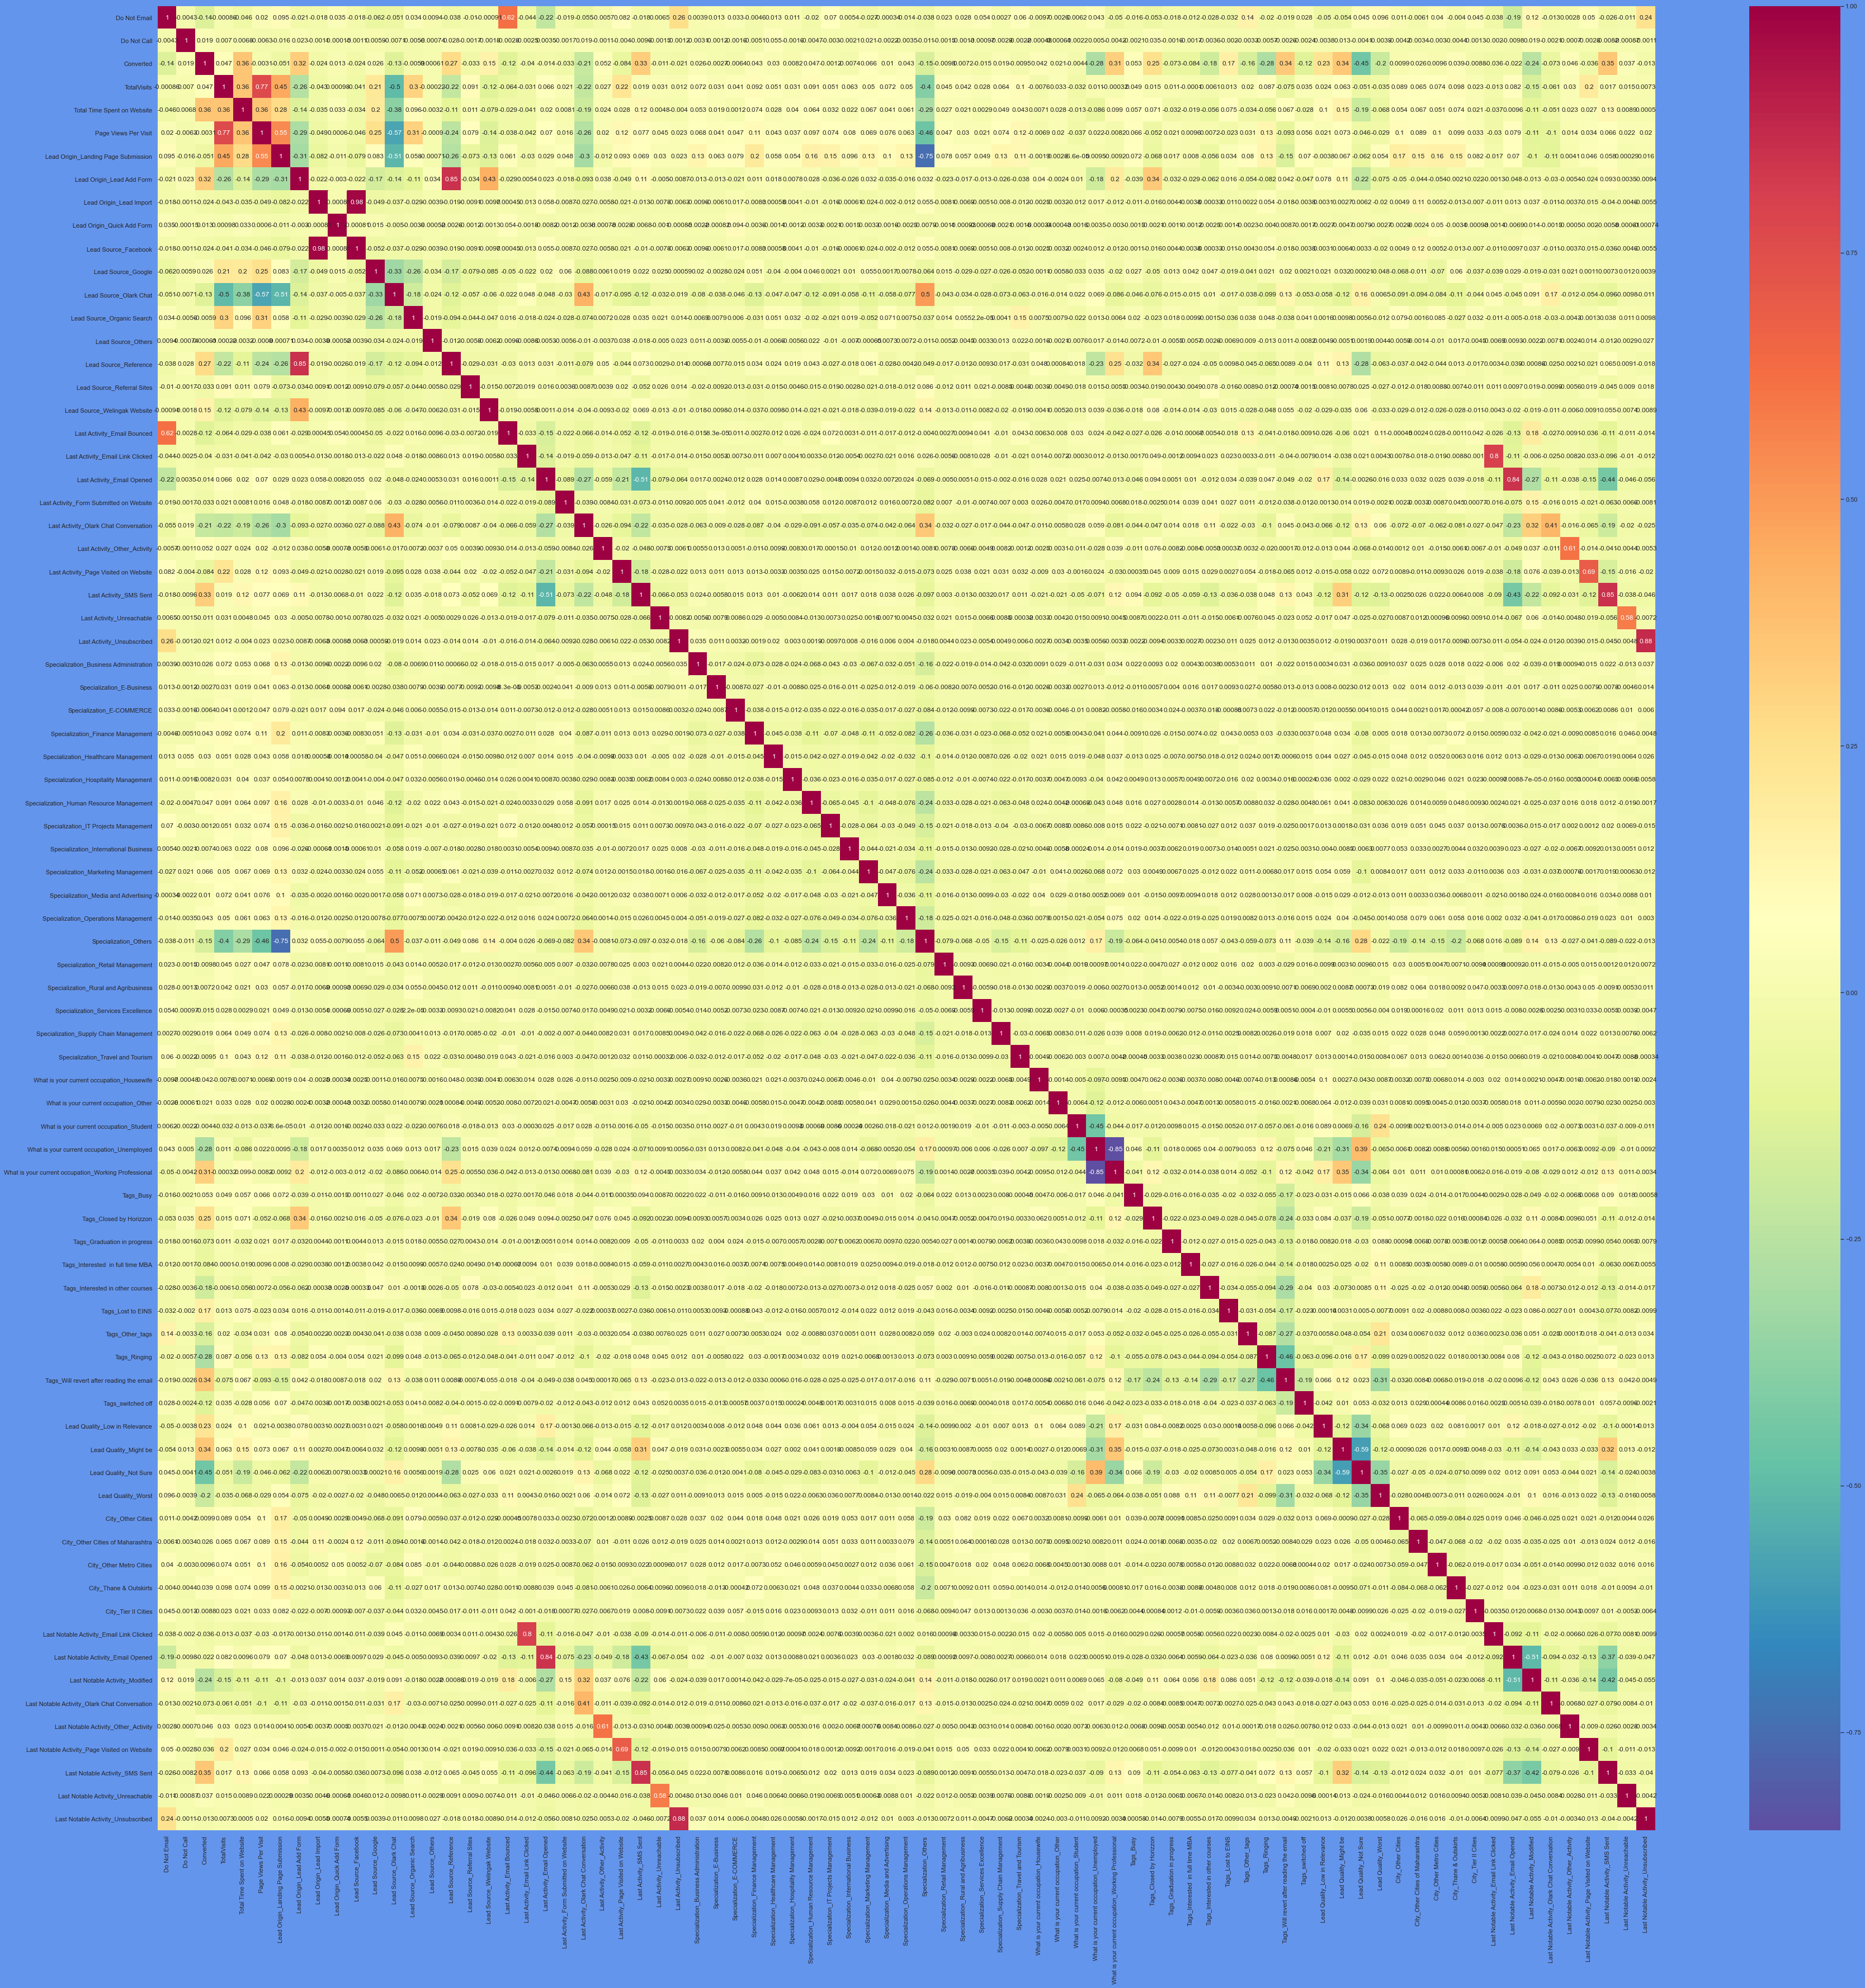

In [133]:
# Zoom in to read the values
plt.figure(figsize=(60,60))
sns.heatmap(leads.corr(),annot=True,cmap="Spectral_r")



- This was just a second measure to understand if we are missing any corelations which might help us with the model
- There are not many high corelations except the ones like Last Activity_Unsubscribed and Last Notable Activity_Unsubscribed. These are the type of corelations that dont make sense as they are actually same variables told differently

In [134]:
# Getting the predicted values on the training data set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
    

1871    0.001363
6795    0.249317
3516    0.001363
8105    0.265375
3934    0.083004
4844    0.996999
3297    0.001363
8071    0.999808
987     0.083004
7423    0.988752
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)


In [136]:
y_train_pred[:10]

array([0.00136302, 0.24931662, 0.00136302, 0.26537464, 0.0830039 ,
       0.99699866, 0.00136302, 0.99980793, 0.0830039 , 0.98875155])

In [137]:
#Creating a final data set with the conversion score
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_probability":y_train_pred})

y_train_pred_final["Prospect ID"] = y_train.index

y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.001363,1871
1,0,0.249317,6795
2,0,0.001363,3516
3,0,0.265375,8105
4,0,0.083004,3934


In [138]:
# Creating a new column to predict the conversion of a certain person
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted
0,0,0.001363,1871,0
1,0,0.249317,6795,0
2,0,0.001363,3516,0
3,0,0.265375,8105,0
4,0,0.083004,3934,0


#### Confusion matrix

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

print(confusion)

[[3841  161]
 [ 362 2104]]


In [140]:
## Predicted    not_conv    conv
## Actual
## not_conv    3841         161
## conv        362          2104

In [141]:
# Overall model accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.9191403834260977


## So the model accuracy is 91.91 %

#### Checking VIF

In [142]:
# This dataframe will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col_top_15].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_top_15].values, i) for i in range(X_train[col_top_15].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.28
1,Lead Source_Welingak Website,1.27
9,Tags_switched off,1.12
4,Tags_Busy,1.11
6,Tags_Lost to EINS,1.06
13,Last Notable Activity_Olark Chat Conversation,1.05
3,What is your current occupation_Working Profes...,0.63
2,Last Activity_SMS Sent,0.46
11,Lead Quality_Worst,0.43
8,Tags_Will revert after reading the email,0.15


#### Sensitivity, specificity, false positive rate, Positive predictive value, negative predictive value

In [143]:
# True positive
TP = confusion[1,1]

# True negative
TN = confusion[0,0]

# False positive
FP = confusion[0,1]

# False negative
FN = confusion[1,0]

print("Sensitivity {}\n".format(round(((TP)/(TP + FN)),2)))

print("Specificity {}\n".format(round(((TN)/(TN + FP)),2)))

print("False Positive Rate {}\n".format(round(((FP)/(TN + FP)),2)))

print("Positive Predictive value {}\n".format(round(((TP)/(TP + FP)),2)))

print("Negative Predictive value {}\n".format(round(((TN)/(TN + FN)),2)))

print("True Positive rate {}\n".format(round(((TP)/(TP + FN)),2)))

print("False Positive rate {}\n".format(round(((FP)/(TN + FP)),2)))

Sensitivity 0.85

Specificity 0.96

False Positive Rate 0.04

Positive Predictive value 0.93

Negative Predictive value 0.91

True Positive rate 0.85

False Positive rate 0.04



### Step 7 : Plotting the ROC curve

An ROC curve will help us understand the below things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will cause a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [144]:
def draw_roc( actual, probs ):
    sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve sensitivity vs specificity')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"], 
                                         drop_intermediate= False)

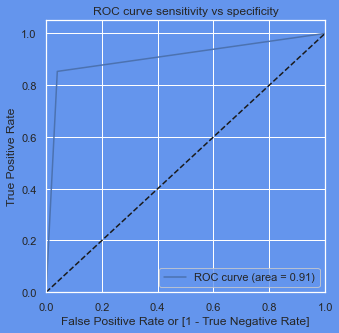

In [146]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["predicted"])

### Step 8: Finding optimal cut-off point

Optimal cutoff probability is the probability where we get a balance between sensitvity and specificity

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_probability"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001363,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.249317,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001363,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.265375,8105,0,1,1,1,0,0,0,0,0,0,0
4,0,0.083004,3934,0,1,0,0,0,0,0,0,0,0,0


In [148]:
# Calculating sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.800557     0.958232     0.703398
0.2          0.2  0.812925     0.953366     0.726387
0.3          0.3  0.918831     0.855231     0.958021
0.4          0.4  0.919295     0.855231     0.958771
0.5          0.5  0.919140     0.853204     0.959770
0.6          0.6  0.918677     0.850365     0.960770
0.7          0.7  0.918831     0.846715     0.963268
0.8          0.8  0.870439     0.678021     0.989005
0.9          0.9  0.861317     0.648824     0.992254


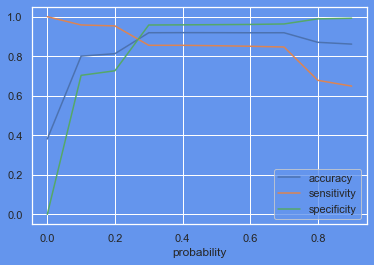

In [149]:
# plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above curve 0.233 is the optimum probability as thats where the accuracy, sensitivity and specificity coincide**

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_probability"].map( lambda x: 1 if x > 0.233 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001363,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.249317,6795,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.001363,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.265375,8105,0,1,1,1,0,0,0,0,0,0,0,1
4,0,0.083004,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [151]:
y_train_pred_final["Lead_score"] = y_train_pred_final["Converted_probability"].map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,0,0.001363,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.249317,6795,0,1,1,1,0,0,0,0,0,0,0,1,25
2,0,0.001363,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.265375,8105,0,1,1,1,0,0,0,0,0,0,0,1,27
4,0,0.083004,3934,0,1,0,0,0,0,0,0,0,0,0,0,8


#### Checking model accuracy, confusion matrix and all those metrics again

In [152]:
metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

# True positive
TP = confusion2[1,1]

# True negative
TN = confusion2[0,0]

# False positive
FP = confusion2[0,1]

# False negative
FN = confusion2[1,0]

print("Sensitivity {}\n".format(round(((TP)/(TP + FN)),2)))

print("Specificity {}\n".format(round(((TN)/(TN + FP)),2)))

print("False Positive Rate {}\n".format(round(((FP)/(TN + FP)),2)))

print("Positive Predictive value {}\n".format(round(((TP)/(TP + FP)),2)))

print("Negative Predictive value {}\n".format(round(((TN)/(TN + FN)),2)))

print("True Positive rate {}\n".format(round(((TP)/(TP + FN)),2)))

print("False Positive rate {}\n".format(round(((FP)/(TN + FP)),2)))

Sensitivity 0.94

Specificity 0.73

False Positive Rate 0.27

Positive Predictive value 0.68

Negative Predictive value 0.95

True Positive rate 0.94

False Positive rate 0.27



#### Precision and Recall

In [153]:
print("Precision {}\n".format(((TP)/(TP + FP))))

print("Recall {}\n".format(((TP)/(TP + FN))))

Precision 0.6844117647058824

Recall 0.9436334144363342



In [154]:
print("Precision {}".format(precision_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))
print("Recall {}".format(recall_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))

Precision 0.6844117647058824
Recall 0.9436334144363342


#### Precision and Recall trade-off

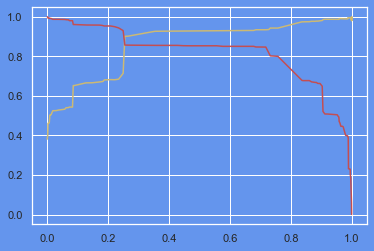

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"])
                                                             
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Make predictions on the data set

In [156]:
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4269,0,0,1.746601,0.964504,2.114966,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2376,0,0,-1.152121,-0.885371,-1.269958,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0,0,0.659580,-0.777416,1.550812,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9199,0,0,-1.152121,-0.885371,-1.269958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,0,-1.152121,-0.885371,-1.269958,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [157]:
X_test = X_test[col_top_15]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
4269,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
2376,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7766,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4359,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

4269    0.757611
2376    0.995350
7766    0.972450
9199    0.002165
4359    0.957887
9186    0.988752
1631    0.903290
8963    0.903290
8007    0.083004
5324    0.988752
dtype: float64

In [159]:
#Convert y_test_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4269,0.757611
2376,0.995350
7766,0.972450
9199,0.002165
4359,0.957887


In [160]:
#Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)

y_test_df["Prospect ID"] = y_test_df.index

In [161]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.757611
1,1,2376,0.995350
2,1,7766,0.972450
3,0,9199,0.002165
4,1,4359,0.957887


In [163]:
# Rename the last column to show Conversion probability
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

# Rearrange the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_probability'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_probability
0,4269,1,0.757611
1,2376,1,0.995350
2,7766,1,0.972450
3,9199,0,0.002165
4,4359,1,0.957887


In [164]:
y_pred_final['final_predicted'] = y_pred_final["Converted_probability"].map(lambda x: 1 if x > 0.233 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,final_predicted
0,4269,1,0.757611,1
1,2376,1,0.995350,1
2,7766,1,0.972450,1
3,9199,0,0.002165,0
4,4359,1,0.957887,1


In [166]:
# Overall model accuracy
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"])

0.812049062049062

## Model accuracy is 81.5%

In [167]:
confusion_final = metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final["final_predicted"])
confusion_final

array([[1210,  467],
       [  54, 1041]], dtype=int64)

In [168]:
# True positive
TP = confusion_final[1,1]

# True negative
TN = confusion_final[0,0]

# False positive
FP = confusion_final[0,1]

# False negative
FN = confusion_final[1,0]

print("Sensitivity {}\n".format(round(((TP)/(TP + FN)),2)))

print("Specificity {}\n".format(round(((TN)/(TN + FP)),2)))

print("False Positive Rate {}\n".format(round(((FP)/(TN + FP)),2)))

print("Positive Predictive value {}\n".format(round(((TP)/(TP + FP)),2)))

print("Negative Predictive value {}\n".format(round(((TN)/(TN + FN)),2)))

print("True Positive rate {}\n".format(round(((TP)/(TP + FN)),2)))

print("False Positive rate {}\n".format(round(((FP)/(TN + FP)),2)))

Sensitivity 0.95

Specificity 0.72

False Positive Rate 0.28

Positive Predictive value 0.69

Negative Predictive value 0.96

True Positive rate 0.95

False Positive rate 0.28

